In [50]:
print("Hello!, this is Implementation of Credit Card Fraud Detection")

Hello!, this is Implementation of Credit Card Fraud Detection


In [51]:
import pandas as pd

In [52]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [53]:
import pandas as pd

In [54]:
df=pd.read_csv('creditcard.csv')
df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [55]:
df.shape

(284807, 31)

In [56]:
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [57]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [58]:
import matplotlib.pyplot  as plt

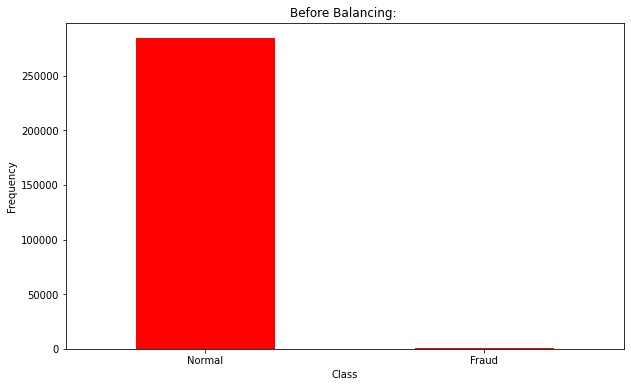

In [59]:
count_classes = pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind='bar', rot=0,color ='r',figsize = (10, 6))
plt.title("Before Balancing: ")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [60]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [61]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [62]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

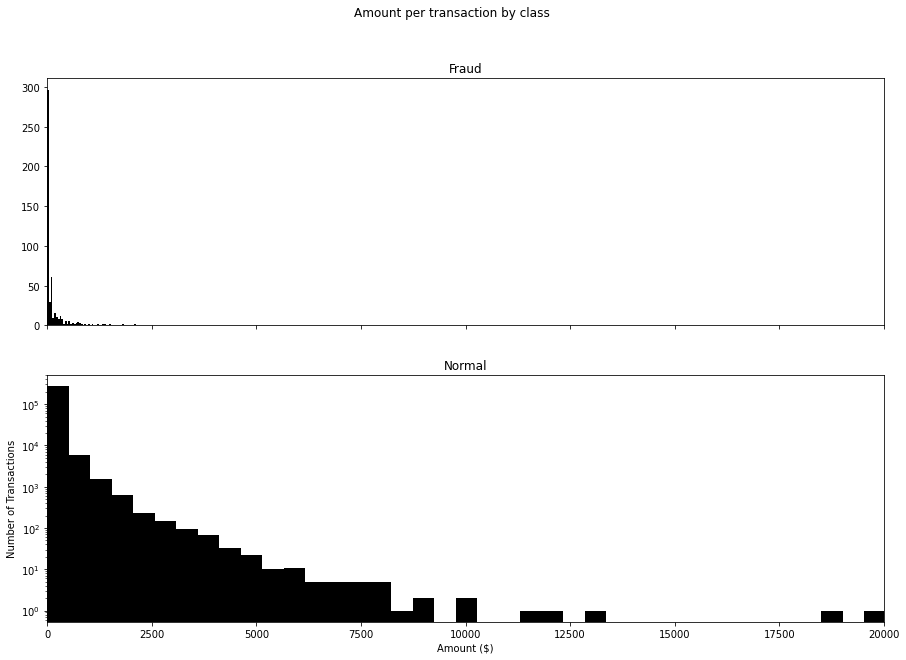

In [63]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize = (15, 10))
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins,facecolor="black")
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins,facecolor="black")
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();


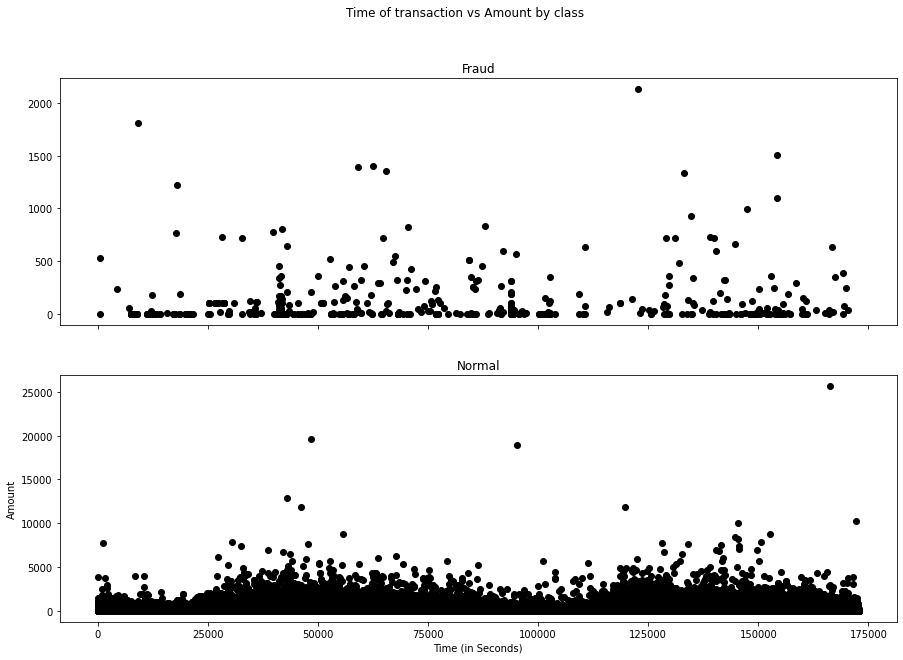

In [64]:
f,(ax1, ax2)= plt.subplots(2, 1,sharex=True, figsize = (15, 10))
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount,facecolor="black")
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount,facecolor="black")
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

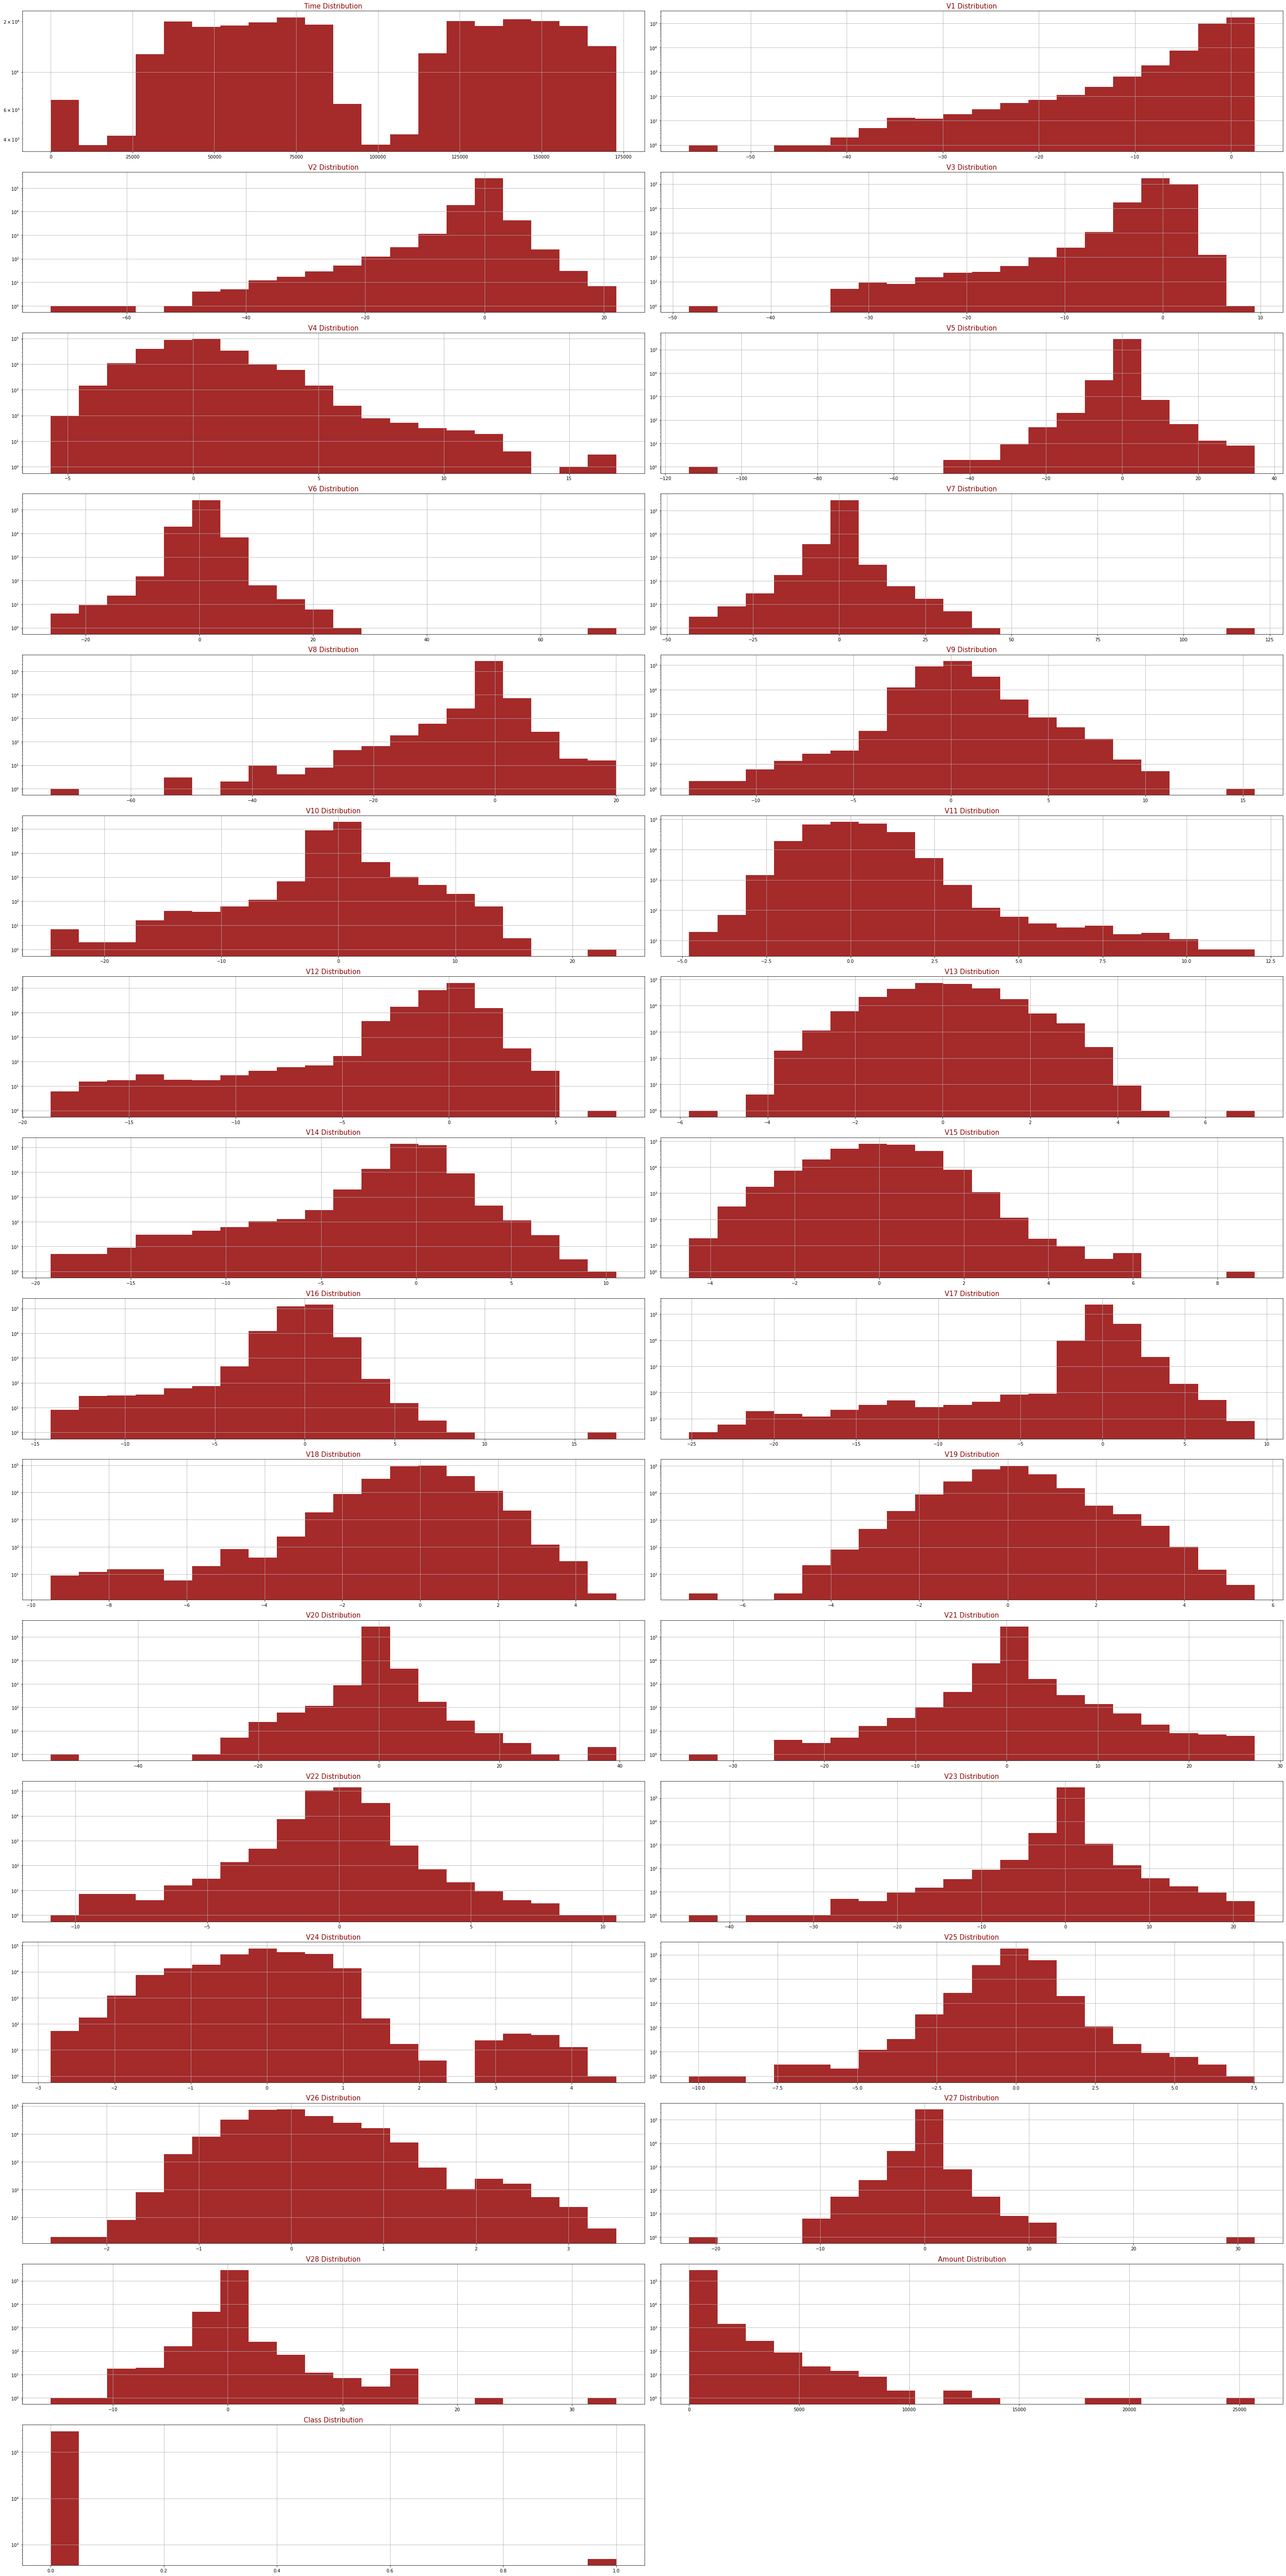

In [94]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(40,80))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='brown')
        ax.set_title(feature+" Distribution",color='DarkRed',fontsize=15)
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df,df.columns,16,2)

In [66]:
x=df.drop("Class",axis=1)
y=df.Class
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.50)

In [95]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)


c:\users\hpw\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0 0 0 ... 0 0 0]
[0 1]
[142135    269]


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142159
           1       0.68      0.75      0.71       245

    accuracy                           1.00    142404
   macro avg       0.84      0.87      0.86    142404
weighted avg       1.00      1.00      1.00    142404



In [97]:
from sklearn.ensemble  import RandomForestClassifier
logmodel = RandomForestClassifier()
logmodel.fit(X_train,y_train)

RandomForestClassifier()

In [98]:
predictions = logmodel.predict(X_test)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 0 0 ... 0 0 0]
[0 1]
[142196    208]


In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142159
           1       0.94      0.80      0.87       245

    accuracy                           1.00    142404
   macro avg       0.97      0.90      0.93    142404
weighted avg       1.00      1.00      1.00    142404



In [68]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [69]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)

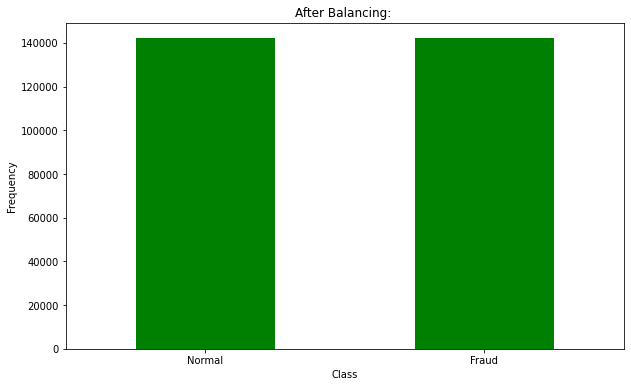

In [70]:
count_classes = pd.value_counts(y_train_ns, sort=True)
count_classes.plot(kind='bar', rot=0,color ='g',figsize = (10, 6))
plt.title("After Balancing: ")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [71]:
y_train_ns.value_counts()

0    142156
1    142156
Name: Class, dtype: int64

In [72]:
dataset=X_train_ns

In [73]:
dataset['Class']=y_train_ns

In [74]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,56223.000000,1.365817,-0.118905,-0.514938,-0.568016,-0.191871,-0.998293,0.002778,-0.342495,-1.351761,...,0.238745,0.714672,-0.204241,0.095018,0.783278,-0.015993,0.008924,0.025479,29.000000,0
1,164022.000000,1.878880,0.451989,0.121615,3.690087,0.132744,0.571653,-0.344602,0.109274,-0.645140,...,-0.193058,-0.532362,0.451862,0.672494,-0.502679,-0.418389,0.012161,-0.015179,7.840000,0
2,27557.000000,1.441465,-0.954342,0.562080,-1.295261,-1.469230,-0.729832,-0.922953,-0.175936,-1.980127,...,-0.153161,0.006829,0.090288,0.396902,0.292547,-0.199774,0.050363,0.023498,20.000000,0
3,40769.000000,0.890897,-0.528187,-0.678654,0.168701,-0.141127,-1.037345,0.786720,-0.463099,-0.231256,...,0.072491,-0.283583,-0.367602,-0.003742,0.548136,1.073835,-0.156020,0.029210,249.000000,0
4,70842.000000,-0.323996,0.456340,2.027779,0.297477,-0.468551,-0.391655,0.083709,0.174760,0.526093,...,0.222431,0.685649,-0.105720,0.374904,-0.175688,-0.475033,0.095055,0.058577,14.880000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284307,153057.060366,0.412726,1.341147,-0.882332,2.633433,0.832540,-0.252334,0.191202,-0.012359,-1.528748,...,0.340399,0.660866,-0.173612,0.425945,0.024918,-0.189151,-0.031780,-0.068079,18.617718,1
284308,169812.900766,-2.506989,0.720418,-4.606594,1.481324,-0.910303,-2.211609,-2.214658,1.096429,-1.388350,...,0.625235,0.005453,-0.295030,-0.129955,-0.430614,0.572507,0.760462,-0.142159,203.399328,1
284309,12881.139432,-3.275548,4.515745,-7.764617,5.545714,-4.471696,-1.387392,-7.777594,1.578724,-1.341431,...,1.897918,0.207477,0.594314,-0.358183,-1.265924,0.187759,-0.063493,0.177707,60.681841,1
284310,160865.235680,-0.476823,4.743225,-7.967966,7.320157,-0.111124,-2.689064,-3.087976,1.286829,-4.130491,...,0.562158,-0.526776,0.016930,-0.682822,0.047821,0.487580,0.622346,0.178976,0.783871,1


In [75]:
dataset.Class.value_counts()

0    142156
1    142156
Name: Class, dtype: int64

In [76]:
x=dataset.drop("Class",axis=1)
y=dataset["Class"]
test_X=X_test
test_Y=y_test
test_Y.value_counts()

0    142159
1       245
Name: Class, dtype: int64

In [77]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x,y)

c:\users\hpw\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [78]:
predictions = logmodel.predict(test_X)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 0 0 ... 0 0 0]
[0 1]
[139062   3342]


In [79]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    142159
           1       0.07      0.91      0.12       245

    accuracy                           0.98    142404
   macro avg       0.53      0.95      0.56    142404
weighted avg       1.00      0.98      0.99    142404



In [80]:
x1=dataset.drop("Class",axis=1)
y1=dataset["Class"]
test_X1=X_test
test_Y1=y_test
test_Y1.value_counts()

0    142159
1       245
Name: Class, dtype: int64

In [89]:
from sklearn.ensemble  import RandomForestClassifier
logmodel = RandomForestClassifier()
logmodel.fit(x1,y1)

RandomForestClassifier()

In [92]:
predictions = logmodel.predict(test_X1)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 0 0 ... 0 0 0]
[0 1]
[142159    245]


In [93]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142159
           1       0.86      0.86      0.86       245

    accuracy                           1.00    142404
   macro avg       0.93      0.93      0.93    142404
weighted avg       1.00      1.00      1.00    142404

